### **Import Necessary Libraries**

In [6]:
import numpy as np 
import os
import tensorflow as tf

import matplotlib.pyplot as plt
from PIL import Image

from tqdm import tqdm

### **Preparing the Data** 

In [7]:
dataset = "C:/Users/Jamil/Downloads/Uni/GP/Dataset/Data (Cropped)"

subjects = os.listdir(dataset)
print(subjects)

['Jad Kandah', 'Jamil Hawwash', 'Jood Maan', 'Joseph Batbouta', 'Mohammad Al Shalloudi', 'Mohammad Al-Jonaidee', 'Mohammad Noor', 'Rami Hawwash', 'Rashid Kandah', 'Sukayna Madi']


In [8]:
awake = []
drowsy = []

for subject in subjects:
    subject_path = os.path.join(dataset, subject)
    for image in os.listdir(subject_path):
        if image.startswith("awake"):
            awake.append(os.path.join(subject_path, image))
        elif image.startswith("drowsy"):
            drowsy.append(os.path.join(subject_path, image))
        
print(f"Awake Images: {len(awake)}")
print(f"Drowsy Images: {len(drowsy)}")
print(f"Total Images: {len(awake) + len(drowsy)}")

Awake Images: 966
Drowsy Images: 988
Total Images: 1954


In [9]:
X = []
Y = []

# Process images from the directory (Awake)
for image in tqdm(awake):
    temp = np.array(Image.open(image).resize((64, 64))) # Resize the images to 64x64
    X.append(temp)
    Y.append(1)
    

# Process images from the directory (Drowsy)
for image in tqdm(drowsy):
    temp = np.array(Image.open(image).resize((64, 64))) # Resize the images to 64x64
    X.append(temp)
    Y.append(0)

100%|██████████| 988/988 [00:01<00:00, 539.64it/s]


In [10]:
# Convert the lists to numpy arrays
X = np.array(X)
Y = np.array(Y) 

X = X/255.0 # Normalize the images

In [11]:
X.shape

(1954, 64, 64, 3)

In [13]:
X.shape

(1954, 64, 64, 3)

### **Splitting the Data into Train (80%) and Test (20%)**

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (1563, 64, 64, 3)
x_test: (391, 64, 64, 3)
y_train: (1563,)
y_test: (391,)


### **Building the CNN Model**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

In [19]:
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))

# Max Pooling Layer 1
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))

# Max Pooling Layer 2
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))

# Max Pooling Layer 3
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(512, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

c:\Users\Jamil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### **Training the Model**

In [20]:
if tf.config.list_physical_devices('GPU'):
    print('GPU is available')
else:
    print('GPU is NOT available')

GPU is NOT available


In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    steps_per_epoch=len(x_train) // 32,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5167 - loss: 0.6965 - val_accuracy: 0.6212 - val_loss: 0.6705
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3592 - loss: 0.3319 - val_accuracy: 0.5752 - val_loss: 0.6702
Epoch 3/100


c:\Users\Jamil\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6528 - loss: 0.6239 - val_accuracy: 0.7895 - val_loss: 0.4429
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3403 - loss: 0.3190 - val_accuracy: 0.7847 - val_loss: 0.4348
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.8266 - loss: 0.3970 - val_accuracy: 0.7847 - val_loss: 0.4200
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4159 - loss: 0.1978 - val_accuracy: 0.8135 - val_loss: 0.3898
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8652 - loss: 0.3155 - val_accuracy: 0.9049 - val_loss: 0.2363
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4537 - loss: 0.1257 - val_accuracy: 0.9049 - val_loss: 0.2287
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9251 - loss: 0.2119 - val_accuracy: 0.9169 - val_loss: 0.1937
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4537 - loss: 0.1543 - val_accuracy: 0.9169 - val_loss

In [22]:
# Save the Model
model.save('model.h5')

c:\Users\Jamil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


In [23]:
# Load the Model
model = tf.keras.models.load_model('model.h5')

### **Evaluating the Model**

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)        │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)       │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 4608)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 512)               │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 1)                 │        513 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,453,571 (9.36 MB)

 Trainable params: 2,453,569 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [47]:
evaluation = model.evaluate(x_test, y_test)

print(f"Accuracy: {evaluation[1]:.3f}")
print(f"Loss: {evaluation[0]:.3f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9326 - loss: 0.1873
Accuracy: 0.940
Loss: 0.154


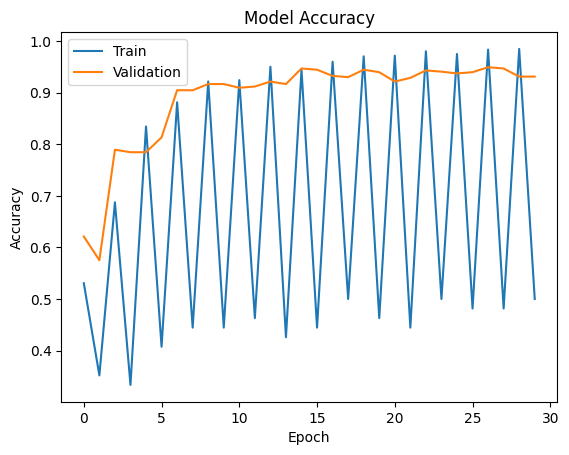

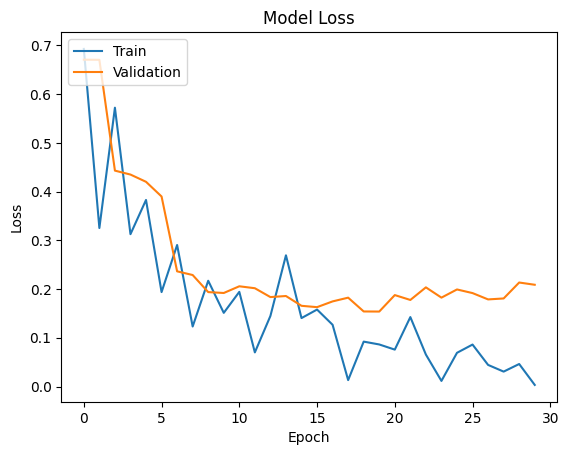

In [48]:
# Plotting Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

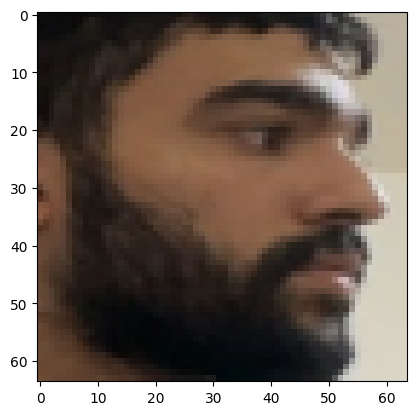

Actual: 1 (Awake)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted: [[0.9782035]] (Awake)


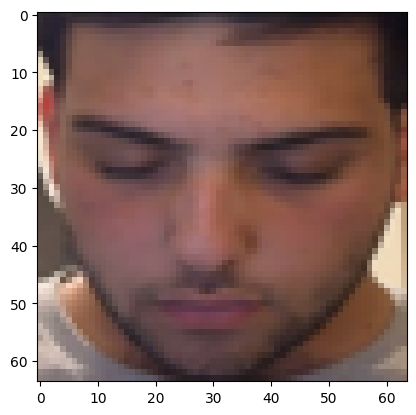

Actual: 0 (Drowsy)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted: [[0.01799281]] (Drowsy)


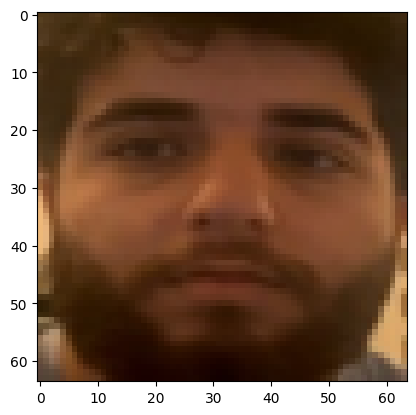

Actual: 1 (Awake)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted: [[0.99965143]] (Awake)


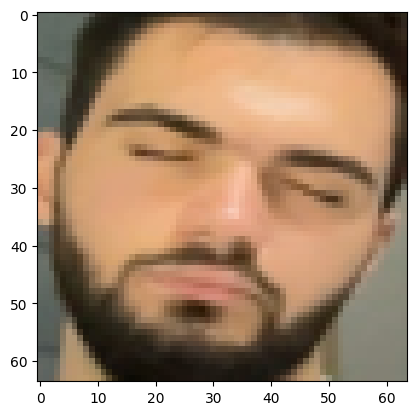

Actual: 0 (Drowsy)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted: [[0.00019383]] (Drowsy)


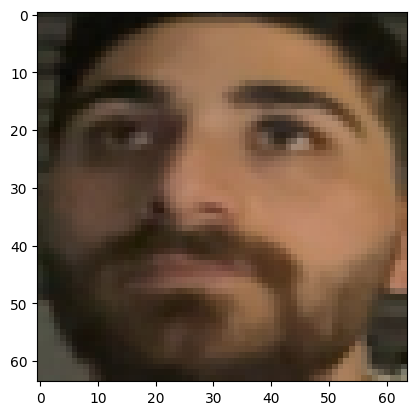

Actual: 1 (Awake)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted: [[0.9845012]] (Awake)


In [49]:
# Showing some predictions from the test set
for i in range(5, 10):
    plt.imshow(x_test[i])
    plt.show()
    print(f"Actual: {y_test[i]} ({'Awake' if y_test[i] == 1 else 'Drowsy'})")
    print(f"Predicted: {model.predict(np.expand_dims(x_test[i], axis=0))} ({'Awake' if model.predict(np.expand_dims(x_test[i], axis=0))[0][0] > 0.5 else 'Drowsy'})")